In [9]:
import sys
import pandas as pd
import numpy as np
import ast
from multi_blade import MultiBlade
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from matplotlib_venn import venn3, venn3_circles, venn2
from sklearn.metrics import cohen_kappa_score

In [10]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## English Annotations (Audrey)

In [11]:
blade_en = MultiBlade(
   model_path = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20",
    source_path="/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/translated/df_1.parquet",
    lang = "EN",
    blade_state_path='/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/multi_blade_state_EN_trained.pkl'
)

In [12]:
df_en = blade_en.df_docs[blade_en.df_docs.human_labeled==True]

In [13]:
blade_en.df_docs[blade_en.df_docs.human_labeled==True]

,lemmas_x_x,id_top,doc_id,id_preproc,lemmas_x_y,text,len,label,human_labeled
0,order avoid future allergic_reaction range vomit hive anaphylactic_shock rani family remain_vigilant avoid exposure allergen time rani food option increase list food allergic grow,0,EN_607595_99219-9,0,order avoid future allergic_reaction range vomit hive anaphylactic_shock rani family need remain_vigilant avoid exposure allergen time rani food option increase list food allergic grow,"In order to avoid future allergic reactions – which could range from vomiting and hives to anaphylactic shock – Rani’s family needed to remain vigilant, avoiding exposure to her allergens. As time went on and Rani’s food options increased, the list of foods she was allergic to also grew.",24,"[1, 1, 1, 1]",True
13562,black woman affect hiv_aids hiv_aids diagnosis woman occur black woman white woman hispanic woman hiv leading_death black woman age year fourth_leading death hispanic woman age year additional information hiv_aids woman girl,13562,EN_376215_57685-2,13562,black woman affect hiv_aids new hiv_aids diagnosis woman occur black woman white woman hispanic woman hiv leading_death black woman age year fourth_leading death hispanic woman age year additional information hiv_aids woman girl available,"Black women were especially affected by HIV/AIDS. In 2005, 66% of the new HIV/AIDS diagnoses in women occurred in black women, compared with 17% in white women and 14% in Hispanic women (1). HIV was the third leading cause of death for black women aged 25--44 years and the fourth leading cause of death for Hispanic women aged 35--44 years (3). Additional information on HIV/AIDS among women and girls is available at http://www.cdc.gov/hiv/topics/women/index.htm and http://www.cdc.gov/healthyyouth/sexualbehaviors/index.htm.",33,"[1, 0, 1, 1]",True
15787,move walk home sit minute time minute sit,15787,EN_1231156_279723-12,15787,move walk home sit minute time minute sit,Keep moving and walking once you get home. Try not to sit for more than 45 minutes at a time. Get up and move around after 45 minutes if you will be sitting longer.,8,"[1, 0, 0, 0]",True
34629,wean step long child bottle hard information technology information technology child drink cup refuse refuse bottle bottle time method child month world health organization bottle comfort habit food,34629,EN_1363336_297461-5,34629,wean step long child bottle hard information technology information technology child drink cup refuse refuse bottle bottle time method child month old world health organization bottle comfort habit food,"Weaning in One Step: The longer a child uses a bottle, the harder it may be for them to give it up. If your child can already drink from a cup but refuses to do so or refuses to give up the bottle, you might have to take away all bottles completely at one time. This method applies to children 15 to 18 months and older who use the bottle for comfort or habit and not for food.",29,"[0, 1, 0, 0]",True
34940,line chart estimate annual number people treat hepatitis_c number high low people treat people treat people treat people treat people treat people treat people treat,34940,EN_1162111_20911-16,34940,line chart estimate annual number people treat hepatitis_c number high low people treat people treat people treat people treat people treat people treat people treat,"The line chart shows the estimated annual numbers of people treated for hepatitis C in the U.S. from 2014 to 2020. The number is highest in 2015, and lowest in 2020. In 2014, 109,110 people were treated; in 2015, 164,247 people were treated; in 2016, 134,287 people were treated; in 2017, 114,419 people were treated; in 2018, 122,666 people were treated; in 2019, 114,893 people were treated; in 2020, 83,740 people were treated.",25,"[0, 0, 0, 0]",True
...,...,...,...,...,...,...,...,...,...
1339200,childbeare women antibody prevalence childbearing woman measure blind serologic_testing blood sample collect filter paper newborn measure ma

In [14]:
pred_en = blade_en.predict(path_save = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/multi_df_docs_predicted_EN.csv")

In [15]:
filtered_df = pred_en[
    (pred_en['predicted_label'].apply(tuple) == (1, 1, 1, 0)) |
    (pred_en['predicted_label'].apply(tuple) == (1, 0, 1, 0)) |
    (pred_en['predicted_label'].apply(tuple) == (0, 1, 1, 0))
]
filtered_df

,id_top,text,predicted_label
236,237,"Breastfeeding is a natural thing to do, but it still comes with its fair share of questions. Here's what you need to know about how often and how long to breastfeed your baby.","[1, 1, 1, 0]"
606,607,Human placental lactogen. This hormone is also known as human chorionic somatomammotropin. It is made by the placenta. It gives nutrition to the fetus. It also stimulates milk glands in the breasts for breastfeeding.,"[1, 0, 1, 0]"
1480,1481,Did a parent or other adult in the household. . .,"[1, 1, 1, 0]"
1490,1491,"“We need to construct systems that lift up and support everybody to enable women to be able to breastfeed,” she says.","[1, 0, 1, 0]"
2102,2103,"Next steps:\n- To lower the risk for SIDS, get regular prenatal care and breastfeed your baby. Don't smoke during pregnancy.\n- To lower the risk for SIDS and other sleep-related deaths, your baby should sleep and take naps on his or her back.\n- Your baby should sleep in the same room with you for at least the first 6 months. Ideally, it should be for the first year. Place the baby close to your bed, but in a separate bed or crib for infants.","[1, 1, 1, 0]"
...,...,...,...
1386088,1386257,"Analyses based on the question ascertaining sexual identity indicated that nationwide, among currently sexually active students, 30.3% of heterosexual students; 24.4% of gay, lesbian, and bisexual students; and 18.8% of not sure students had used birth control pills; an IUD or implant; or a shot, patch, or birth control ring before last sexual intercourse (Supplementary Table 149). The prevalence of having used birth control pills; an IUD or implant; or a shot, patch, or birth control ring before last sexual intercourse was higher among heterosexual (30.3%) than gay, lesbian, and bisexual (24.4%) students. Among female students, the prevalence was higher among heterosexual (37.0%) than lesbian and bisexual (27.2%) and not sure (19.6%) students. Among male students, the prevalence was higher among heterosexual (24.5%) than gay and bisexual (10.5%) students. The prevalence also was higher among heterosexual female (37.0%) than heterosexual male (24.5%) students and higher among lesbian and bisexual female (27.2%) than gay and bisexual male (10.5%) students.","[1, 0, 1, 0]"
1389657,1389826,"Across all groups, the percentage of mothers who start and continue breastfeeding is rising, according to a report released today by the Centers for Disease Control and Prevention (CDC).Â From 2000 to 2008, mothers who started breastfeeding increased more than 4 percentage points. During that same time, the number of mothers still breastfeeding at six months jumped nearly 10 percentage points, from 35 percent in 2000 to nearly 45 percent in 2008.","[1, 0, 1, 0]"
1389727,1389896,"If your baby is exclusively breastfeeding and gaining weight as expected, there’s no need to pump right away. It can be tempting to build up a supply of milk for later. But this isn’t a good idea because it can cause an over-supply of milk and keep your breasts engorged (over-full) for a longer period of time than expected.","[1, 1, 1, 0]"
1389827,1389996,Breastfeeding mothers everywhere are incorrectly told to stop eating dairy or other foods to ‘treat’ their baby’s eczema. Not only is this unnecessary for most mothers but can lead to significant problems associated with a restricted diet…and not actually treat the eczema.,"[1, 0, 1, 0]"


In [16]:
filtered_df = pred_en[#
    ~(pred_en['predicted_label'].apply(tuple) == (0, 0, 0, 0))
]
len(filtered_df)

1308531

## Spanish Annotations (Valerie)

In [17]:
blade_es = MultiBlade(
   model_path = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20",
    source_path="/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/translated/df_1.parquet",
    lang = "ES",
    blade_state_path='/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/multi_blade_state_ES_trained.pkl'
)

/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator SGDClassifier from version 1.3.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.3.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator OneVsRestClassifier from version 1.3.2 when using version 1.2.1. This might lead to breaking code or invalid res

In [18]:
blade_raw = MultiBlade(
    model_path = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20",
    source_path="/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/translated/df_1.parquet",
    lang = "ES",
    blade_state_path='/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/multi_blade_state_ES.pkl'
)

In [19]:
df_es = blade_es.df_docs[blade_es.df_docs.human_labeled==True]

In [20]:
aux = df_es[df_es.human_labeled==True]
indices_to_exclude = aux.id_top.values.tolist()
mask = np.ones(blade_raw.X_pool.shape[0], dtype=bool)  # Start with all True
mask[indices_to_exclude] = False

blade_es.X_pool = blade_raw.X_pool[mask]
df_pool = blade_raw.df_pool
blade_es.df_pool = df_pool[~df_pool.id_top.isin(aux.id_top.values.tolist())]

In [21]:
df_pool = blade_raw.df_pool
blade_es.df_pool = df_pool[~df_pool.id_top.isin(aux.id_top.values.tolist())]

In [22]:
pred_es = blade_es.predict(path_save = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/multi_df_docs_predicted_ES.csv")

/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/src/active_learning/multi_blade.py:332: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_pool['predicted_label'] = [list(pred) for pred in predictions]
/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/src/active_learning/multi_blade.py:333: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_pool['human_labeled'] = False


In [23]:
filtered_df_es = pred_es[
    (pred_es['predicted_label'].apply(tuple) == (1, 1, 1, 0)) |
    (pred_es['predicted_label'].apply(tuple) == (1, 0, 1, 0)) |
    (pred_es['predicted_label'].apply(tuple) == (0, 1, 1, 0))
]
filtered_df_es

,id_top,text,predicted_label
16,16,"¿Tiene usted entre 18 y 55 años de edad y no tiene un estilo de vida activo? Este estudio evalúa el efecto del entrenamiento de resistencia y aeróbico en la presión arterial y la salud cardiovascular. Durante el transcurso de 8 semanas, los participantes asistirán a un programa de ejercicios y proporcionarán muestras de sangre, junto con otras evaluaciones de salud y estudios por imágenes. Para participar en este estudio, debe aceptar participar en el estudio completo, que durará 24 a 26 semanas (las 16 a 18 semanas restantes no incluyen ejercicios). También debe haber nacido en los Estados Unidos, y sus padres deben ser ambos afroamericanos o los dos de raza blanca no hispana. Este estudio se lleva a cabo en Chicago (Illinois). Haga clic en el nombre del ensayo para obtener más información en el sitio web de ensayos clínicos de los NIH (en inglés).","[1, 1, 1, 0]"
18,18,"¿Cómo se diagnostica la extrofia de la vejiga: La extrofia de la vejiga en general puede diagnosticarse mediante una ecografía fetal antes de que nazca el bebé. Una vez que nace el bebé, la extrofia se puede detectar en un examen físico. El médico de su hijo puede solicitar otros procedimientos de diagnóstico.","[1, 0, 1, 0]"
29,29,"Este estudio está interesado en aprender más sobre la presencia y ubicación de determinadas bacterias en los pulmones de personas con fibrosis quística, mediante el examen de los pulmones que se han resecado de pacientes con fibrosis quística sometidos a trasplante de pulmón. Para participar en este estudio, debe tener al menos 18 años, debe tener diagnóstico de fibrosis quística, ser elegible para un trasplante pulmonar y haber probado todos los otros tratamientos disponibles sin éxito. Este estudio se lleva a cabo en Minneapolis (Minnesota).","[1, 1, 1, 0]"
32,32,"¿Sufre una enfermedad cardíaca que requiere un DCI para prevenir un paro cardíaco súbito? El objetivo de este estudio es aprender qué signos diferencian a los pacientes que tienen un mayor riesgo de arritmia que lleva a un paro cardíaco súbito. Los investigadores planean realizar el seguimiento de los pacientes con un reemplazo de CDI reciente durante 10 años. Para participar en este estudio, debe tener entre 18 y 85 años. Este estudio se lleva a cabo en Washington (D.C.), Baltimore (Maryland) y Richmond (Virginia).","[1, 1, 1, 0]"
46,46,"¿Usted o su hijo tienen un trastorno de plaquetas, de sangrado, o de glóbulos blancos? Este estudio analiza a personas que tienen trastornos plaquetarios u otros trastornos hematológicos. Los investigadores utilizarán una muestra de sangre para analizar la presencia de problemas con las plaquetas y una posible causa genética en el ADN o el ARN del participante. Para participar en este estudio, debe ser un niño o adulto ya sea sano o con un trastorno plaquetario, trastorno de la coagulación o trastorno de los glóbulos blancos. Este estudio se lleva a cabo en Nueva York (Nueva York)","[1, 1, 1, 0]"
...,...,...,...
1062811,1062840,"Las visitas en el puerperio pasaron a ser telefónicas o por videollamada durante la primera ola de la pandemia. En el embarazo, estas se mantuvieron por más tiempo de forma no presencial, a excepción de casos específicos que requirieran atención inmediata. Las matronas coincidieron en que, por este motivo, la salud de las mujeres en el puerperio estuvo desprotegida.","[1, 0, 1, 0]"
1062833,1062862,"Comprender las enfermedades del corazón y los vasos sanguíneos El objetivo de este estudio es recabar datos y obtener muestras de personas que tienen enfermedad cardíaca o de los vasos sanguíneos, incluida PAD. Esto puede incluir análisis de sangre, exámenes ecográficos y pruebas cardíacas y pulmonares. Los familiares y las personas sanas también pueden participar. Los resultados podrán ayudar a los investigadores a comprender mejor la PAD y otras enfermedades del corazón y de los vasos sanguíneos. Los participantes deben tener al menos 2 años. Las mujeres que estén embarazadas no

## Second Evaluation (Karla)

In [24]:
df_second = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/second_eval_annotations_upt.csv")

## Kappa coefficient

In [25]:
df_second = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/second_eval_annotations_upt.csv")
df_second["label"] = df_second["label"].apply(lambda x: [int(el) for el in ast.literal_eval(x)])
df_second["third_eval_label"] = df_second["third_eval_label"].apply(lambda x: [int(el) for el in x.split(",")])

In [26]:
categories = ['health', 'kids', 'mothers', 'social_services']

for i, category in enumerate(categories):
    df_second[f'label_{category}'] = df_second['label'].apply(lambda x: x[i])
    df_second[f'third_eval_label_{category}'] = df_second['third_eval_label'].apply(lambda x: x[i])

df_second[['id_top', 'doc_id', 'text',  'label',  'third_eval_label']]

,id_top,doc_id,text,label,third_eval_label
0,408957,ES_169946_1723-11,"“Aproximadamente dos tercios de los niños que tienen TDAH seguirán ajustándose a los criterios de TDAH cuando sean adultos”, dice la Dra. Ruggiero. Pero, dice, eso no significa que los síntomas sigan siendo los mismos. “Los síntomas del TDAH son diferentes a medida que los niños crecen y las exigencias cambian”. Y con la ayuda adecuada, los niños pueden aprender habilidades que los ayuden a controlar los síntomas y reducir los efectos a medida que crecen.","[0, 0, 0, 0]","[1, 1, 0, 0]"
1,416302,ES_1018513_128596-0,"Resúmenes: Los adultos de edad avanzada y mal alimentados, por lo general, presentan carencia de vitamina C, la cual puede conducir a una enfermedad nutricional como el escorbuto.","[1, 0, 0, 0]","[1, 0, 0, 0]"
2,373465,EN_163691_46334-1,"Kim Mook, MHS; Barbara A. Laraia, PhD; Vanessa M. Oddo, MPH; Jessica C. Jones-Smith, PhD: Suggested citation for this article: Mook K, Laraia BA, Oddo VM, Jones-Smith JC. Food Security Status and Barriers to Fruit and Vegetable Consumption in Two Economically Deprived Communities of Oakland, California, 2013–2014. Prev Chronic Dis 2016;13:150402. DOI: http://dx.doi.org/10.5888/pcd13.150402external icon.","[0, 0, 0, 0]","[0, 0, 0, 0]"
3,959603,ES_1025129_131017-15,No se han realizado estudios para ver si dextroanfetamina puede causar problemas en el comportamiento o aprendizaje para el niño.,"[1, 0, 0, 0]","[1, 1, 0, 0]"
4,761585,ES_436460_56595-1,"No hay ningún médico cuyo apellido comience con dicha letra Q Q Buscar un médico cuyo apellido comience con una letra R R Buscar un médico cuyo apellido comience con una letra S S Buscar un médico cuyo apellido comience con una letra T T No hay ningún médico cuyo apellido comience con dicha letra U U Buscar un médico cuyo apellido comience con una letra V V Buscar un médico cuyo apellido comience con una letra W W No hay ningún médico cuyo apellido comience con dicha letra X X No hay ningún médico cuyo apellido comience con dicha letra Y Y No hay ningún médico cuyo apellido comience con dicha letra Z Z Por afecciones que se tratan No se encontraron resultados Por procedimientos realizados No se encontraron resultados Por idioma hablado No se encontraron resultados Restablece todos los filtros Consejos para la búsqueda Usa comillas para las frases. Haz clic en “Search” (buscar) aunque no haya sugerencias automáticas dentro del campo de búsqueda, ya que igual podrías obtener resultados. Mostrando 1-3 de 3 médicos disponibles Inicial del apellido: H Paul J. Hampel, M.D. hematólogo hematólogo oncólogo Rochester, MN Áreas de especialización: Inmunoterapia, Tratamiento de cáncer, terapia de células T con receptores de antígenos quiméricos , Medicamentos de ter...apia dirigida, Leucemia linfocítica crónica, Linfoma no Hodgkin, Linfoma de Hodgkin, Tricoleucemia Mostrar más áreas de especialización para Paul J. Hampel, M.D. Suzanne R. Hayman, M.D. internista hematólogo Rochester, MN Áreas de especialización: Mieloma múltiple, Amiloidosis Talal Hilal, M.B., B.Ch.","[1, 0, 0, 0]","[0, 0, 0, 0]"
...,...,...,...,...,...
143,952390,ES_685538_96704-1,"Esta página le ayuda a encontrar más información sobre beneficios, tarjetas Lone Star, licencias/credenciales y regulación, ayuda para descargar formularios, problemas con el sitio web y quejas de proveedores.","[1, 1, 1, 1]","[0, 0, 0, 0]"
144,314604,ES_66500_15368-0,"Los bebés dependen de sus cuidadores para la comida, el cariño y el cuidado y para satisfacer necesidades tan básicas como comer, cambiar pañales, dormir y los vínculos afectivos. Pero cada bebé es único. Algunos bebés pueden tranquilizarse fácilmente y son capaces de calmarse rápidamente por sí solos. Otros pueden llorar con frecuencia o durante largos períodos de tiempo. Para prosperar, los bebés necesitan cuidadores que los protejan, se preocupen por ellos y sean receptivos. Un cuidador desarrolla una relación receptiva con un bebé respondiendo a su llanto, a sus balbu

In [47]:
non_agreement = df_second[df_second.label != df_second.third_eval_label][['id_top', 'doc_id', 'text',  'label',  'third_eval_label']]
non_agreement.to_excel("non_agreement_es.xlsx")

In [48]:
agreement = df_second[df_second.label == df_second.third_eval_label][['id_top', 'doc_id', 'text',  'label',  'third_eval_label']]
agreement.to_excel("agreement_es.xlsx")
len(agreement)

50

In [27]:
def calculate_kappa(df, categories):
    # Cohen's Kappa for each category
    kappa_scores = {}
    
    for category in categories:
        kappa = cohen_kappa_score(df[f'label_{category}'], df[f'third_eval_label_{category}'])
        kappa_scores[category] = kappa
    
    # Mean Kappa score across all categories
    mean_kappa = np.mean(list(kappa_scores.values()))
    
    print("Kappa scores by category:")
    for category, kappa in kappa_scores.items():
        print(f"{category}: {kappa}")
    
    print(f"\nMean Cohen's Kappa coefficient (total agreement): {mean_kappa}")

    return list(kappa_scores.values())

print("-- KAPPA ENGLISH ANNOTATIONS --")
df_second_en = pd.merge(df_en, df_second, on='doc_id')
english_scores = calculate_kappa(df_second_en, categories=['health', 'kids', 'mothers', 'social_services'])

print("-- KAPPA SPANISH ANNOTATIONS --")
df_second_es = pd.merge(df_es, df_second, on='doc_id')
spanish_scores = calculate_kappa(df_second_es, categories=['health', 'kids', 'mothers', 'social_services'])

print("-- KAPPA ALL ANNOTATIONS --")
all_scores = calculate_kappa(df_second, categories=['health', 'kids', 'mothers', 'social_services'])

-- KAPPA ENGLISH ANNOTATIONS --
Kappa scores by category:
health: 0.5061963775023832
kids: 0.7066402378592667
mothers: 0.7144432194046306
social_services: 0.20749665327978573

Mean Cohen's Kappa coefficient (total agreement): 0.5336941220115166
-- KAPPA SPANISH ANNOTATIONS --
Kappa scores by category:
health: 0.15023923444976073
kids: 0.10515247108307046
mothers: 0.09756097560975607
social_services: 0.13771186440677974

Mean Cohen's Kappa coefficient (total agreement): 0.12266613638734175
-- KAPPA ALL ANNOTATIONS --
Kappa scores by category:
health: 0.3279158699808795
kids: 0.41419816138917265
mothers: 0.4586513994910941
social_services: 0.18047579983593098

Mean Cohen's Kappa coefficient (total agreement): 0.34531030767426935


In [28]:
spanish_scores

[0.15023923444976073,
 0.10515247108307046,
 0.09756097560975607,
 0.13771186440677974]

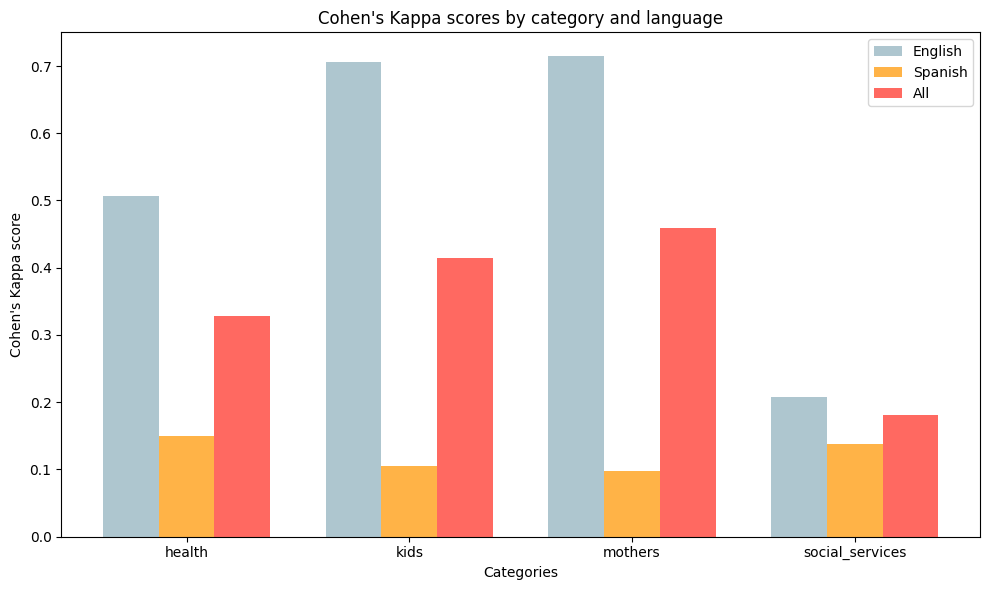

In [29]:
pastel_colors = ['#AEC6CF', '#FFB347', '#FF6961']

# Setting up the bar positions
bar_width = 0.25
index = np.arange(len(categories))

# Creating the bar chart
plt.figure(figsize=(10, 6))

plt.bar(index, english_scores, bar_width, label='English', color=pastel_colors[0])
plt.bar(index + bar_width, spanish_scores, bar_width, label='Spanish', color=pastel_colors[1])
plt.bar(index + 2 * bar_width, all_scores, bar_width, label='All', color=pastel_colors[2])

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel("Cohen's Kappa score")
plt.title("Cohen's Kappa scores by category and language")
plt.xticks(index + bar_width, categories)
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
# Assuming df is your dataframe
# Categories
categories = ['health', 'kids', 'mothers', 'social_services']

def get_category_combinations(df, columns):
    # binary representation for each category combination
    binary_representations = df[columns].apply(lambda x: tuple(x), axis=1)
    return Counter(binary_representations)

# Create separate dataframes for English, Spanish, and All annotations
english_df = df_second_en[[f'label_{category}' for category in categories]].reset_index(drop=False)
english_third = df_second_en[[f'third_eval_label_{category}' for category in categories]]
spanish_df = df_second_es[[f'label_{category}' for category in categories]]
spanish_third = df_second_es[[f'third_eval_label_{category}' for category in categories]]

In [31]:
english_df['combination'] = english_df.apply(
    lambda row: f"{row['label_health']}{row['label_kids']}{row['label_mothers']}{row['label_social_services']}",
    axis=1
)

# Now you can count the combinations and proceed with the visualization
combination_counts = english_df['combination'].value_counts()

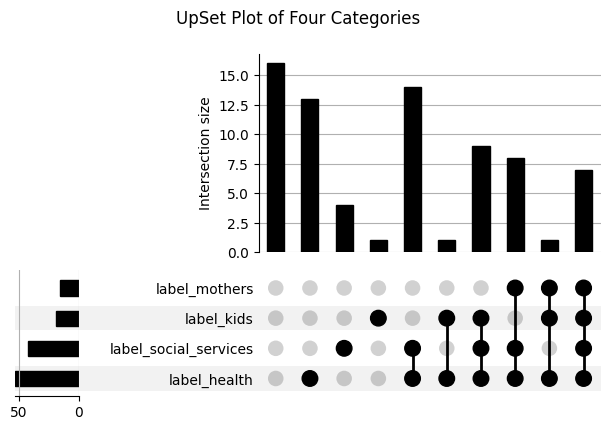

In [34]:
import pandas as pd
from upsetplot import UpSet
import matplotlib.pyplot as plt

from upsetplot import UpSet, generate_counts

# Generate counts based on the combination
combinations = english_df['combination'].value_counts()
combinations_dict = combinations.to_dict()

# Convert dictionary to DataFrame and create a MultiIndex with proper names
combinations_df = pd.DataFrame(list(combinations_dict.items()), columns=['combination', 'count'])
combinations_df[['label_health', 'label_kids', 'label_mothers', 'label_social_services']] = combinations_df['combination'].apply(lambda x: pd.Series(list(x))).astype(int)
combinations_df = combinations_df.set_index(['label_health', 'label_kids', 'label_mothers', 'label_social_services'])

# Create the upset_data Series
upset_data = combinations_df['count']

# Create the UpSet plot
upset_plot = UpSet(upset_data)
upset_plot.plot()

# Display the plot
plt.suptitle('UpSet Plot of Four Categories')
plt.show()


## Keep documents labelled as "In Domain"

In [35]:
keep_en_ids = filtered_df.id_top.values.tolist() + blade_en.df_docs[blade_en.df_docs.human_labeled==True].id_top.values.tolist()
keep_en_doc_ids = blade_en.df_docs[blade_en.df_docs.id_top.isin(keep_en_ids)].doc_id.values.tolist()

keep_es_ids = filtered_df_es.id_top.values.tolist() + blade_es.df_docs[blade_es.df_docs.human_labeled==True].id_top.values.tolist()
keep_es_doc_ids = blade_es.df_docs[blade_es.df_docs.id_top.isin(keep_es_ids)].doc_id.values.tolist()

In [36]:
df_all = pd.read_parquet("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/translated_stops/df_1.parquet")
df_keep = df_all[df_all.doc_id.isin(keep_en_doc_ids + keep_es_doc_ids)]

In [37]:
df_keep.to_parquet("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/multi_blade_filtered/df_1.parquet")

## Keep documents labelled as "0,0,0,0"

In [38]:
all_en = pd.concat([blade_en.df_docs[blade_en.df_docs.human_labeled==True],pred_en])
all_en["final_label"] = np.where(pd.notna(all_en["label"]), all_en["label"], all_en["predicted_label"])
len(all_en)

1393097

In [39]:
all_en.head()

,lemmas_x_x,id_top,doc_id,id_preproc,lemmas_x_y,text,len,label,human_labeled,predicted_label,final_label
0,order avoid future allergic_reaction range vomit hive anaphylactic_shock rani family remain_vigilant avoid exposure allergen time rani food option increase list food allergic grow,0,EN_607595_99219-9,0.0,order avoid future allergic_reaction range vomit hive anaphylactic_shock rani family need remain_vigilant avoid exposure allergen time rani food option increase list food allergic grow,"In order to avoid future allergic reactions – which could range from vomiting and hives to anaphylactic shock – Rani’s family needed to remain vigilant, avoiding exposure to her allergens. As time went on and Rani’s food options increased, the list of foods she was allergic to also grew.",24.0,"[1, 1, 1, 1]",True,NaN,"[1, 1, 1, 1]"
13562,black woman affect hiv_aids hiv_aids diagnosis woman occur black woman white woman hispanic woman hiv leading_death black woman age year fourth_leading death hispanic woman age year additional information hiv_aids woman girl,13562,EN_376215_57685-2,13562.0,black woman affect hiv_aids new hiv_aids diagnosis woman occur black woman white woman hispanic woman hiv leading_death black woman age year fourth_leading death hispanic woman age year additional information hiv_aids woman girl available,"Black women were especially affected by HIV/AIDS. In 2005, 66% of the new HIV/AIDS diagnoses in women occurred in black women, compared with 17% in white women and 14% in Hispanic women (1). HIV was the third leading cause of death for black women aged 25--44 years and the fourth leading cause of death for Hispanic women aged 35--44 years (3). Additional information on HIV/AIDS among women and girls is available at http://www.cdc.gov/hiv/topics/women/index.htm and http://www.cdc.gov/healthyyouth/sexualbehaviors/index.htm.",33.0,"[1, 0, 1, 1]",True,NaN,"[1, 0, 1, 1]"
15787,move walk home sit minute time minute sit,15787,EN_1231156_279723-12,15787.0,move walk home sit minute time minute sit,Keep moving and walking once you get home. Try not to sit for more than 45 minutes at a time. Get up and move around after 45 minutes if you will be sitting longer.,8.0,"[1, 0, 0, 0]",True,NaN,"[1, 0, 0, 0]"
34629,wean step long child bottle hard information technology information technology child drink cup refuse refuse bottle bottle time method child month world health organization bottle comfort habit food,34629,EN_1363336_297461-5,34629.0,wean step long child bottle hard information technology information technology child drink cup refuse refuse bottle bottle time method child month old world health organization bottle comfort habit food,"Weaning in One Step: The longer a child uses a bottle, the harder it may be for them to give it up. If your child can already drink from a cup but refuses to do so or refuses to give up the bottle, you might have to take away all bottles completely at one time. This method applies to children 15 to 18 months and older who use the bottle for comfort or habit and not for food.",29.0,"[0, 1, 0, 0]",True,NaN,"[0, 1, 0, 0]"
34940,line chart estimate annual number people treat hepatitis_c number high low people treat people treat people treat people treat people treat people treat people treat,34940,EN_1162111_20911-16,34940.0,line chart estimate annual number people treat hepatitis_c number high low people treat people treat people treat people treat people treat people treat people treat,"The line chart shows the estimated annual numbers of people treated for hepatitis C in the U.S. from 2014 to 2020. The number is highest in 2015, and lowest in 2020. In 2014, 109,110 people were treated; in 2015, 164,247 people were treated; in 2016, 134,287 people were treated; in 2017, 114,419 people were treated; in 2018, 122,666 people were treated; in 2019, 114,893 people were treated; in 2020, 83,740 people were treated.",25.0,"[0, 0, 0, 0]",True,NaN,"[0, 0, 0, 0]"


In [40]:
filtered_df_en = all_en[
    (all_en['final_label'].apply(tuple) == (0, 0, 0, 0)) | 
    (all_en['final_label'].apply(tuple) == (0, 0, 0, 1))
]
print(len(all_en))
print(len(filtered_df_en))
print(f"Removing {((len(all_en)-len(filtered_df_en))/len(all_en))*100} % documents")

1393097
198566
Removing 85.7464340243357 % documents


In [41]:
filtered_df_en.head()

,lemmas_x_x,id_top,doc_id,id_preproc,lemmas_x_y,text,len,label,human_labeled,predicted_label,final_label
34940,line chart estimate annual number people treat hepatitis_c number high low people treat people treat people treat people treat people treat people treat people treat,34940,EN_1162111_20911-16,34940.0,line chart estimate annual number people treat hepatitis_c number high low people treat people treat people treat people treat people treat people treat people treat,"The line chart shows the estimated annual numbers of people treated for hepatitis C in the U.S. from 2014 to 2020. The number is highest in 2015, and lowest in 2020. In 2014, 109,110 people were treated; in 2015, 164,247 people were treated; in 2016, 134,287 people were treated; in 2017, 114,419 people were treated; in 2018, 122,666 people were treated; in 2019, 114,893 people were treated; in 2020, 83,740 people were treated.",25.0,"[0, 0, 0, 0]",True,NaN,"[0, 0, 0, 0]"
177998,fisher aa pascher kanof nb allergic contact_dermatitis ingredient vehicle vehicle tray patch testing arch_dermatol,177999,EN_86511_37801-16,177999.0,fisher aa pascher f kanof nb allergic contact_dermatitis ingredient vehicle vehicle tray patch testing arch_dermatol,"Fisher AA, Pascher F, Kanof NB. Allergic contact dermatitis due to ingredients of vehicles. A vehicle tray for patch testing. Arch Dermatol 1971;104:286-90.",15.0,"[0, 0, 0, 0]",True,NaN,"[0, 0, 0, 0]"
249067,ann lowenfels mary_jo pattison anne martin cindy ferrari view author_affiliation suggested_citation article lowenfels pattison mj martin ferrari improve food environment hospitals senior meal programs prev_chronic dis_doi icon,249068,EN_160480_46217-1,249068.0,ann lowenfels mary_jo pattison anne martin cindy ferrari view author_affiliation suggested_citation article lowenfels pattison mj martin ferrari improve food environment hospitals senior meal programs prev_chronic dis_doi icon,"Ann Lowenfels, MPH1; Mary Jo Pattison, MS1; Anne M. Martin, AS1; Cindy Ferrari, MS2 (View author affiliations): Suggested citation for this article: Lowenfels A, Pattison MJ, Martin AM, Ferrari C. Improving the Food Environment in Hospitals and Senior Meal Programs. Prev Chronic Dis 2018;15:170429. DOI: http://dx.doi.org/10.5888/pcd15.170429external icon.",27.0,"[0, 0, 0, 0]",True,NaN,"[0, 0, 0, 0]"
298912,bow photo doug day thank_god send care son improve life shukla,298915,EN_616100_100363-10,298915.0,bow photo doug day thank_god send care son improve life say shukla,"“They told me they bow down to a photo of Doug almost every day to thank God that he was sent to take care of their son and to improve their lives,” says Dr. Shukla.",12.0,"[0, 0, 0, 0]",True,NaN,"[0, 0, 0, 0]"
373461,kim_mook mhs barbara_laraia phd vanessa_oddo mph jessica_jones smith phd_suggested citation_article mook laraia_ba oddo_vm jones smith_jc food security status barriers fruit_vegetable consumption deprive communities oakland_california prev_chronic dis_doi icon,373465,EN_163691_46334-1,373465.0,kim_mook mhs barbara_laraia phd vanessa_oddo mph jessica_jones smith phd_suggested citation_article mook k laraia_ba oddo_vm jones smith_jc food security status barriers fruit_vegetable consumption deprive communities oakland_california prev_chronic dis_doi icon,"Kim Mook, MHS; Barbara A. Laraia, PhD; Vanessa M. Oddo, MPH; Jessica C. Jones-Smith, PhD: Suggested citation for this article: Mook K, Laraia BA, Oddo VM, Jones-Smith JC. Food Security Status and Barriers to Fruit and Vegetable Consumption in Two Economically Deprived Communities of Oakland, California, 2013–2014. Prev Chronic Dis 2016;13:150402. DOI: http://dx.doi.org/10.5888/pcd13.150402external icon.",28.0,"[0, 0, 0, 0]",True,NaN,"[0, 0, 0, 0]"


In [42]:
filtered_df_es = all_es[
    (all_es['final_label'].apply(tuple) != (0, 0, 0, 0)) #& 
    #(all_es['final_label'].apply(tuple) != (0, 0, 0, 1))
]
print(len(all_es))
print(len(filtered_df_es))
print(f"Removing {((len(all_es)-len(filtered_df_es))/len(all_es))*100} % documents")

NameError: name 'all_es' is not defined

In [ ]:
#filtered_df[filtered_df['text'].str.contains("baby", case=False, na=False)][["text", "final_label"]]

In [ ]:
all_es = pd.concat([blade_es.df_docs[blade_es.df_docs.human_labeled==True],pred_es])
all_es["final_label"] = np.where(pd.notna(all_es["label"]), all_es["label"], all_es["predicted_label"])
len(all_es)

In [ ]:
all_es.head()

In [ ]:
filtered_df_es = all_es[
    (all_es['final_label'].apply(tuple) != (0, 0, 0, 0)) & 
    (all_es['final_label'].apply(tuple) != (0, 0, 0, 1))
]
print(len(all_es))
print(len(filtered_df_es))
print(f"Removing {((len(all_es)-len(filtered_df_es))/len(all_es))*100} % documents")

In [ ]:
keep_en_doc_ids =  blade_en.df_docs[blade_en.df_docs.id_top.isin(filtered_df_en.id_top.values.tolist())].doc_id.values.tolist()
keep_es_doc_ids =  blade_es.df_docs[blade_es.df_docs.id_top.isin(filtered_df_es.id_top.values.tolist())].doc_id.values.tolist()
print(len(keep_en_doc_ids))
print(len(keep_es_doc_ids))

In [ ]:
df_all = pd.read_parquet("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/translated_stops/df_1.parquet")
df_keep = df_all[df_all.doc_id.isin(keep_en_doc_ids + keep_es_doc_ids)]

In [ ]:
len(df_keep) - len(keep_en_doc_ids) - len(keep_es_doc_ids)

In [ ]:
df_keep.to_parquet("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/multi_blade_filtered/df_1.parquet")